In [1]:
import torch 
import numpy as np
from sklearn.metrics import roc_auc_score, r2_score
from matplotlib import pyplot as plt 

import sys 
sys.path.append('../src/')
from utils import load_data
from NN import NN
from CNNAE import CNNAE

%load_ext autoreload
%autoreload 2

/home/teddy/miniconda3/envs/dvgs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x_train, y_train, x_valid, y_valid, x_test, y_test, exog_noise, endog_noise = load_data(dataset     = 'cifar10-unsupervised', 
                                                                                        train_num   = 10000, 
                                                                                        valid_num   = 0, 
                                                                                        exog_noise  = 0., 
                                                                                        endog_noise = 0., 
                                                                                        save_dir    = '../data/', 
                                                                                        clean_up    = False)

print('train size:', x_train.size(), y_train.size())                                                                                        
print('valid size:', x_valid.size(), y_valid.size())                                                                                        
print('test size:', x_test.size(), y_test.size())   

Files already downloaded and verified
Files already downloaded and verified
train size: torch.Size([10000, 3, 32, 32]) torch.Size([10000, 3, 32, 32])
valid size: torch.Size([0, 3, 32, 32]) torch.Size([0, 3, 32, 32])
test size: torch.Size([10000, 3, 32, 32]) torch.Size([10000, 3, 32, 32])


In [3]:
y_train.size()

torch.Size([10000, 3, 32, 32])

In [44]:
model = CNNAE(in_channels=3, hidden_channels=32, latent_channels=10, act=torch.nn.Mish)

######################

use_cuda = True 
verbose = True
lr = 1e-3
epochs = 100
batch_size = 500
crit = torch.nn.MSELoss()

#####################

if torch.cuda.is_available() & use_cuda: 
    device = 'cuda'
else: 
    device = 'cpu'
if verbose: print('using device:', device)

model.train().to(device)
optim = torch.optim.Adam(model.parameters(), lr=lr)

for i in range(epochs): 
    losses = []
    metrics = []
    for idx_batch in torch.split(torch.randperm(x_train.size(0)), batch_size): 
        x = x_train[idx_batch, :].to(device)
        y = y_train[idx_batch, :].to(device)

        optim.zero_grad()
        yhat = model(x)
        loss = crit(yhat, y)
        loss.backward()
        optim.step()

        losses.append(loss.item())
        metrics.append( r2_score(y.detach().cpu().numpy().ravel(), yhat.detach().cpu().numpy().ravel()) )

    if verbose: print(f'epoch: {i} | loss: {np.mean(losses):.4f} | metric: {np.mean(metrics):0.4f}', end='\r')

using device: cuda


In [45]:
device = 'cpu'

model.eval().to(device)

yy = []; yyhat = []

n_test = 5000 # x_test.size(0)

for idx_batch in torch.split(torch.arange(n_test), batch_size): 
    with torch.no_grad():
        x = x_test[idx_batch, :].to(device)
        y = y_test[idx_batch, :].to(device)

        yhat = model(x)

        yy.append(y); yyhat.append(yhat)

yy = torch.cat(yy, dim=0)
yyhat = torch.cat(yyhat, dim=0)


r2 = r2_score(yy.detach().cpu().numpy().ravel(), yyhat.detach().cpu().numpy().ravel())
r2


0.9225645937062923

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


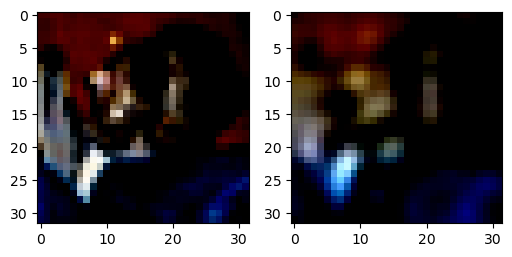

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


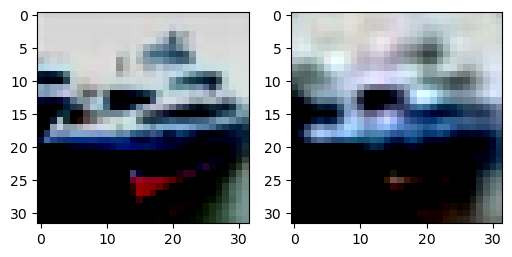

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


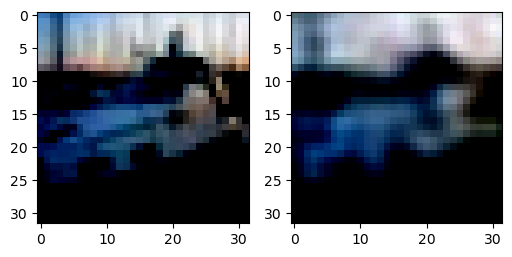

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


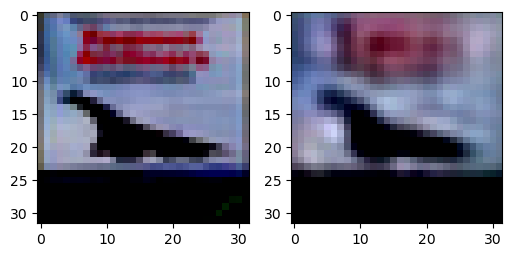

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


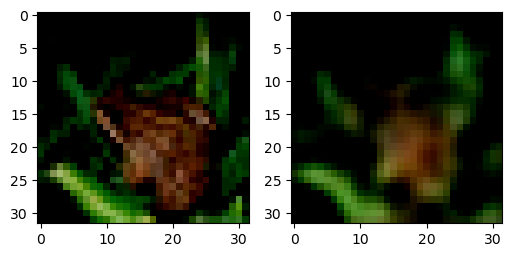

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


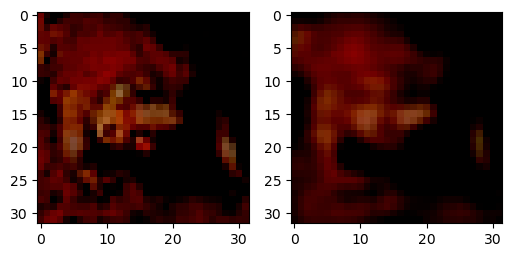

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


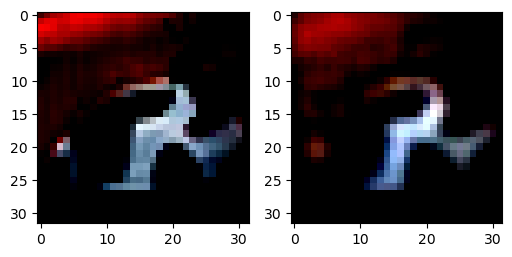

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


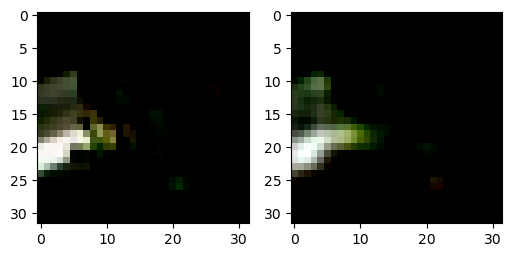

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


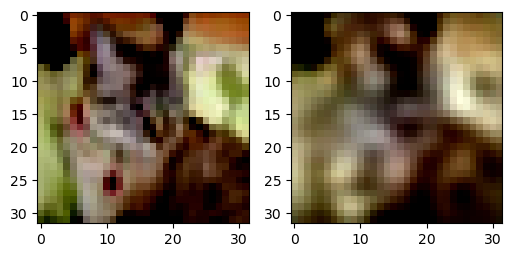

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


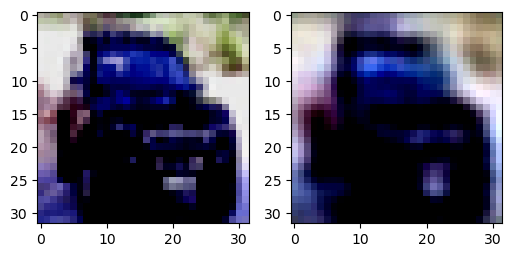

In [46]:

for iii in range(10): 

    f,axes = plt.subplots(1,2, figsize=(6,3))

    axes[0].imshow(yy[iii, :].permute(1, 2, 0).detach().cpu().numpy()  )
    axes[1].imshow(yyhat[iii, :].permute(1, 2, 0).detach().cpu().numpy()  )

    plt.show()